## 2 - Pre-Processing of image chips before applying to AI

This notebook serves as the second step in the application of a methodology for identifying reforestation projects in the Brazilian Atlantic Rainforest. The methodology was developed by Felipe Begliomini as part of his MRes dissertation for the AI4ER program at the University of Cambridge.

As we are working with different platforms, each satellite's data possesses various attributes such as spatial resolution, gridding, and crs. To ensure consistency in applying the AI methodology, this notebook focuses on cropping the images downloaded in the previous notebook (1_download_gee_images.ipynb) to a standardized spatial extent.

All the images will represent an area of 2000x2000 meters. The Planet and reference chips will be cropped to a final size of 400x400 pixels (5m resolution), the Sentinel-1 images will be cropped to 200x200 pixels (10m resolution), and the Sentinel-2 images will be converted to a 100x100 pixel (20m resolution) squared format. This notebook also provides a tool for visualizing the cropped images.

Finally, the images are split into train and test sets to ensure unbiased evaluation and to assess the model's ability to generalize accurately.

### Imports

In [1]:
from src.data.tools.crop_image import crop_ref_img
from src.data.tools.crop_image import crop_other_img
from src.data.tools import vis
from src.data.tools.train_test_split import train_test_split

### Crop the reference data 

This image will be used to define the spatial extent to crop other images. First, we identify the center pixel, and from there we define the size of the image (400x400).

In [2]:
%%time
crop_ref_img(path='../data/gee_data',
             out_dir='../data/croped_data')

CPU times: user 4.74 s, sys: 1.06 s, total: 5.8 s
Wall time: 9.33 s


### Crop the Planet Imagery

The image chips will be cropped based on the bbox from the reference data. The final output will have 400x400 pixels and 5m spatial resolution.

In [ ]:
%%time
crop_other_img(sensor = 'planet',
               to_crop_path='../data/gee_data',
               out_dir='../data/croped_data',
               ref_path='../data/croped_data')

In [3]:
%%time
crop_other_img(sensor = 'red',
               to_crop_path='../data/gee_data',
               out_dir='../data/croped_data',
               ref_path='../data/croped_data')

CPU times: user 1min 23s, sys: 6.57 s, total: 1min 30s
Wall time: 1min 39s


### Crop the Sentinel-1 Imagery

The image chips will be cropped based on the bbox from the reference data. The final output will have 200x200 pixels and 10m spatial resolution.

In [ ]:
%%time
crop_other_img(sensor='s1',
               to_crop_path='../data/gee_data',
               out_dir='../data/croped_data',
               ref_path='../data/croped_data')

### Crop the Sentinel-2 Imagery

The image chips will be cropped based on the bbox from the reference data. The final output will have 100x100 pixels and 20m spatial resolution.

In [ ]:
%%time
crop_other_img(sensor='s2',
               to_crop_path='../data/gee_data',
               out_dir='../data/croped_data',
               ref_path='../data/croped_data')

#### Visualize Cropped Image chips 

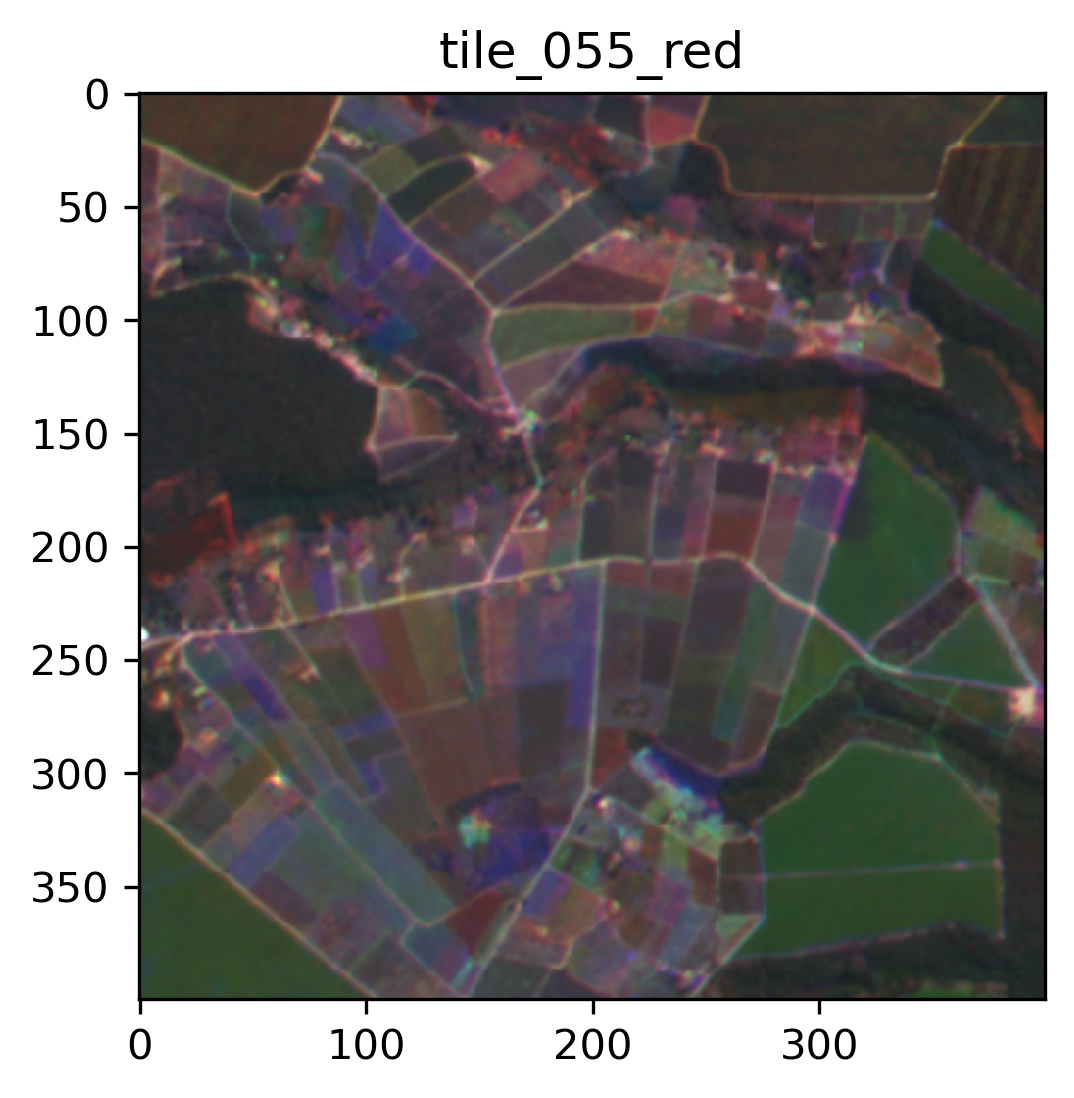

In [3]:
# Visualize reference chips
#vis.viz_reference(tile_number=55)

# Visualize planet chips
#vis.viz_planet(tile_number=55)

# Visualize planet red chips
vis.viz_red(tile_number=55)

# Visualize s1 chips
#vis.viz_s1(tile_number=77)

# Visualize s2 chips
#vis.viz_s2(tile_number=10)

# Visualize all chips
#vis.viz_all(tile_number=1000)

#### Divide in train and teste

In [3]:
%%time
# Split the data in 80% for training and 20% for testing
train_test_split(train_frac=0.2,
                 Planet=False,
                 Planet_red=True,
                 S1=False,
                 S2= False,
                 Palsar= False)

CPU times: user 231 ms, sys: 3.08 s, total: 3.31 s
Wall time: 6.59 s
